In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data/cbb.csv")

In [10]:
data.shape

(3523, 24)

In [5]:
data.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

**TEAM:** The Division I college basketball school

**CONF:** The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

**G:** Number of games played

**W:** Number of games won

**ADJOE:** Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

**ADJDE:** Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

**BARTHAG:** Power Rating (Chance of beating an average Division I team)

**EFG_O:** Effective Field Goal Percentage Shot

**EFG_D:** Effective Field Goal Percentage Allowed

**TOR:** Turnover Percentage Allowed (Turnover Rate)

**TORD:** Turnover Percentage Committed (Steal Rate)

**ORB:** Offensive Rebound Rate

**DRB:** Offensive Rebound Rate Allowed

**FTR:** Free Throw Rate (How often the given team shoots Free Throws)

**FTRD:** Free Throw Rate Allowed

**2P_O:** Two-Point Shooting Percentage

**2P_D:** Two-Point Shooting Percentage Allowed

**3P_O:** Three-Point Shooting Percentage

**3P_D:** Three-Point Shooting Percentage Allowed

**ADJ_T:** Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

**WAB:** Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

**POSTSEASON:** Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

**SEED:** Seed in the NCAA March Madness Tournament

**YEAR:** Season


In [28]:
data.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object

In [29]:
data.POSTSEASON = data.POSTSEASON.astype(str)

In [33]:
ncaa_data = data[data.SEED.isna() == False]

In [35]:
post_season_mapping_to_int = {
    'R68': 0,
    'R64': 1,
    'R32': 2,
    'S16': 3,
    'E8': 4,
    'F4': 5,
    '2ND': 6,
    'Champions': 7
}

In [36]:
ncaa_data.POSTSEASON = ncaa_data.POSTSEASON.map(post_season_mapping_to_int)

/var/folders/wz/cnwy77v95fz65y4_p_vs2l140000gn/T/ipykernel_24444/1276702355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncaa_data.POSTSEASON = ncaa_data.POSTSEASON.map(post_season_mapping_to_int)


In [45]:
X = ncaa_data[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'SEED']]
y = ncaa_data.POSTSEASON

In [46]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [47]:
min_max_scaler = MinMaxScaler()
X_dataset = min_max_scaler.fit_transform(X)
y_dataset = to_categorical(y)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [68]:
X_dataset.shape, y_dataset.shape

((680, 17), (680, 8))

In [108]:
basic_model = Sequential()
basic_model.add(Dense(32, activation='relu', input_shape=(X_dataset.shape[1],)))
basic_model.add(BatchNormalization())
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(8, activation='softmax'))

In [102]:
adam = Adam(learning_rate=1e-5)
basic_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
basic_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                576       
                                                                 
 batch_normalization_9 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 8)                 136       
                                                                 
Total params: 1640 (6.41 KB)
Trainable params: 1576 (6.16 KB)
Non-trainable params: 64 (256.00 Byte)
__________________

In [103]:
history = basic_model.fit(X_dataset, y_dataset, epochs=1500, validation_split=0.2)

Epoch 1/1500
17/17 [==============================] - 1s 13ms/step - loss: 2.0871 - acc: 0.2371 - val_loss: 2.0228 - val_acc: 0.2868
Epoch 2/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0835 - acc: 0.2592 - val_loss: 2.0226 - val_acc: 0.3235
Epoch 3/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0833 - acc: 0.2555 - val_loss: 2.0228 - val_acc: 0.3456
Epoch 4/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0819 - acc: 0.2665 - val_loss: 2.0239 - val_acc: 0.3529
Epoch 5/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0807 - acc: 0.2592 - val_loss: 2.0247 - val_acc: 0.3603
Epoch 6/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0726 - acc: 0.2574 - val_loss: 2.0254 - val_acc: 0.3750
Epoch 7/1500
17/17 [==============================] - 0s 4ms/step - loss: 2.0681 - acc: 0.2757 - val_loss: 2.0260 - val_acc: 0.3824
Epoch 8/1500
17/17 [==============================] - 0s 4ms/step - loss: 2

17/17 [==============================] - 0s 4ms/step - loss: 1.9306 - acc: 0.3879 - val_loss: 1.9362 - val_acc: 0.4779
Epoch 63/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.9281 - acc: 0.3971 - val_loss: 1.9338 - val_acc: 0.4779
Epoch 64/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9198 - acc: 0.3842 - val_loss: 1.9313 - val_acc: 0.4779
Epoch 65/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9115 - acc: 0.3787 - val_loss: 1.9288 - val_acc: 0.4779
Epoch 66/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9055 - acc: 0.3713 - val_loss: 1.9263 - val_acc: 0.4779
Epoch 67/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9123 - acc: 0.3897 - val_loss: 1.9239 - val_acc: 0.4779
Epoch 68/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9096 - acc: 0.3934 - val_loss: 1.9210 - val_acc: 0.4779
Epoch 69/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.9053 -

17/17 [==============================] - 0s 4ms/step - loss: 1.7847 - acc: 0.4504 - val_loss: 1.7928 - val_acc: 0.4632
Epoch 124/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.7878 - acc: 0.4283 - val_loss: 1.7906 - val_acc: 0.4632
Epoch 125/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.7843 - acc: 0.4393 - val_loss: 1.7880 - val_acc: 0.4706
Epoch 126/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.7828 - acc: 0.4338 - val_loss: 1.7856 - val_acc: 0.4706
Epoch 127/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.7776 - acc: 0.4338 - val_loss: 1.7837 - val_acc: 0.4706
Epoch 128/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.7884 - acc: 0.4283 - val_loss: 1.7817 - val_acc: 0.4706
Epoch 129/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.7705 - acc: 0.4449 - val_loss: 1.7798 - val_acc: 0.4706
Epoch 130/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 7ms/step - loss: 1.6726 - acc: 0.4669 - val_loss: 1.6756 - val_acc: 0.4926
Epoch 185/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6709 - acc: 0.4688 - val_loss: 1.6741 - val_acc: 0.5000
Epoch 186/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6833 - acc: 0.4522 - val_loss: 1.6724 - val_acc: 0.5000
Epoch 187/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6723 - acc: 0.4614 - val_loss: 1.6706 - val_acc: 0.5000
Epoch 188/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6714 - acc: 0.4688 - val_loss: 1.6688 - val_acc: 0.5000
Epoch 189/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6702 - acc: 0.4596 - val_loss: 1.6672 - val_acc: 0.5000
Epoch 190/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.6616 - acc: 0.4724 - val_loss: 1.6657 - val_acc: 0.5000
Epoch 191/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 7ms/step - loss: 1.5953 - acc: 0.4779 - val_loss: 1.5887 - val_acc: 0.4926
Epoch 246/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5956 - acc: 0.4761 - val_loss: 1.5874 - val_acc: 0.5000
Epoch 247/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5913 - acc: 0.4688 - val_loss: 1.5862 - val_acc: 0.5000
Epoch 248/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5958 - acc: 0.4669 - val_loss: 1.5848 - val_acc: 0.5000
Epoch 249/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5938 - acc: 0.4853 - val_loss: 1.5839 - val_acc: 0.5000
Epoch 250/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5961 - acc: 0.4688 - val_loss: 1.5828 - val_acc: 0.5000
Epoch 251/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5904 - acc: 0.4632 - val_loss: 1.5814 - val_acc: 0.5000
Epoch 252/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.5387 - acc: 0.4798 - val_loss: 1.5276 - val_acc: 0.4853
Epoch 307/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5312 - acc: 0.4743 - val_loss: 1.5268 - val_acc: 0.4853
Epoch 308/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5247 - acc: 0.4761 - val_loss: 1.5261 - val_acc: 0.4853
Epoch 309/1500
17/17 [==============================] - 0s 6ms/step - loss: 1.5369 - acc: 0.4724 - val_loss: 1.5253 - val_acc: 0.4853
Epoch 310/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5273 - acc: 0.4688 - val_loss: 1.5245 - val_acc: 0.4853
Epoch 311/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5266 - acc: 0.4761 - val_loss: 1.5234 - val_acc: 0.4853
Epoch 312/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.5324 - acc: 0.4743 - val_loss: 1.5227 - val_acc: 0.4853
Epoch 313/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.4743 - acc: 0.4871 - val_loss: 1.4817 - val_acc: 0.5074
Epoch 368/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4767 - acc: 0.4871 - val_loss: 1.4811 - val_acc: 0.5074
Epoch 369/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4864 - acc: 0.4816 - val_loss: 1.4805 - val_acc: 0.5074
Epoch 370/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4829 - acc: 0.4890 - val_loss: 1.4799 - val_acc: 0.5074
Epoch 371/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4786 - acc: 0.4890 - val_loss: 1.4791 - val_acc: 0.5074
Epoch 372/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4754 - acc: 0.4779 - val_loss: 1.4786 - val_acc: 0.5074
Epoch 373/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4803 - acc: 0.4761 - val_loss: 1.4780 - val_acc: 0.5000
Epoch 374/1500
17/17 [==============================] - 0s 6ms/step - loss: 1

17/17 [==============================] - 0s 5ms/step - loss: 1.4488 - acc: 0.4890 - val_loss: 1.4477 - val_acc: 0.5147
Epoch 429/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4599 - acc: 0.4798 - val_loss: 1.4470 - val_acc: 0.5147
Epoch 430/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4436 - acc: 0.4853 - val_loss: 1.4465 - val_acc: 0.5147
Epoch 431/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4401 - acc: 0.5000 - val_loss: 1.4462 - val_acc: 0.5147
Epoch 432/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4355 - acc: 0.4945 - val_loss: 1.4459 - val_acc: 0.5147
Epoch 433/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4318 - acc: 0.4890 - val_loss: 1.4455 - val_acc: 0.5147
Epoch 434/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4383 - acc: 0.4890 - val_loss: 1.4450 - val_acc: 0.5147
Epoch 435/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.4105 - acc: 0.4945 - val_loss: 1.4213 - val_acc: 0.5294
Epoch 490/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4102 - acc: 0.5037 - val_loss: 1.4210 - val_acc: 0.5294
Epoch 491/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4124 - acc: 0.4908 - val_loss: 1.4205 - val_acc: 0.5294
Epoch 492/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4089 - acc: 0.4908 - val_loss: 1.4201 - val_acc: 0.5294
Epoch 493/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4218 - acc: 0.4871 - val_loss: 1.4199 - val_acc: 0.5294
Epoch 494/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4133 - acc: 0.4798 - val_loss: 1.4196 - val_acc: 0.5294
Epoch 495/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.4055 - acc: 0.5037 - val_loss: 1.4192 - val_acc: 0.5294
Epoch 496/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.3728 - acc: 0.5110 - val_loss: 1.4026 - val_acc: 0.5294
Epoch 551/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3846 - acc: 0.4982 - val_loss: 1.4024 - val_acc: 0.5294
Epoch 552/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3793 - acc: 0.5055 - val_loss: 1.4022 - val_acc: 0.5294
Epoch 553/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3764 - acc: 0.5110 - val_loss: 1.4020 - val_acc: 0.5294
Epoch 554/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.3934 - acc: 0.5129 - val_loss: 1.4015 - val_acc: 0.5294
Epoch 555/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3646 - acc: 0.5129 - val_loss: 1.4014 - val_acc: 0.5294
Epoch 556/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3697 - acc: 0.5000 - val_loss: 1.4012 - val_acc: 0.5294
Epoch 557/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.3544 - acc: 0.5074 - val_loss: 1.3877 - val_acc: 0.5368
Epoch 612/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3510 - acc: 0.5129 - val_loss: 1.3875 - val_acc: 0.5368
Epoch 613/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3512 - acc: 0.5221 - val_loss: 1.3873 - val_acc: 0.5368
Epoch 614/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3565 - acc: 0.5092 - val_loss: 1.3871 - val_acc: 0.5368
Epoch 615/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3545 - acc: 0.4945 - val_loss: 1.3869 - val_acc: 0.5368
Epoch 616/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3536 - acc: 0.5018 - val_loss: 1.3866 - val_acc: 0.5368
Epoch 617/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3534 - acc: 0.4945 - val_loss: 1.3862 - val_acc: 0.5368
Epoch 618/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.3304 - acc: 0.5221 - val_loss: 1.3758 - val_acc: 0.5294
Epoch 673/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3440 - acc: 0.5202 - val_loss: 1.3755 - val_acc: 0.5294
Epoch 674/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3336 - acc: 0.5165 - val_loss: 1.3753 - val_acc: 0.5294
Epoch 675/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3262 - acc: 0.5092 - val_loss: 1.3752 - val_acc: 0.5294
Epoch 676/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3370 - acc: 0.4908 - val_loss: 1.3749 - val_acc: 0.5294
Epoch 677/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3396 - acc: 0.5129 - val_loss: 1.3746 - val_acc: 0.5294
Epoch 678/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3340 - acc: 0.5239 - val_loss: 1.3744 - val_acc: 0.5294
Epoch 679/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.3179 - acc: 0.5129 - val_loss: 1.3659 - val_acc: 0.5147
Epoch 734/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3184 - acc: 0.5221 - val_loss: 1.3657 - val_acc: 0.5147
Epoch 735/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.3075 - acc: 0.5092 - val_loss: 1.3654 - val_acc: 0.5147
Epoch 736/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3228 - acc: 0.5221 - val_loss: 1.3653 - val_acc: 0.5147
Epoch 737/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3195 - acc: 0.5257 - val_loss: 1.3651 - val_acc: 0.5147
Epoch 738/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3207 - acc: 0.5239 - val_loss: 1.3650 - val_acc: 0.5147
Epoch 739/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3137 - acc: 0.5129 - val_loss: 1.3649 - val_acc: 0.5147
Epoch 740/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.3080 - acc: 0.5312 - val_loss: 1.3576 - val_acc: 0.5147
Epoch 795/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3106 - acc: 0.5074 - val_loss: 1.3574 - val_acc: 0.5147
Epoch 796/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3072 - acc: 0.5147 - val_loss: 1.3573 - val_acc: 0.5147
Epoch 797/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3056 - acc: 0.5221 - val_loss: 1.3571 - val_acc: 0.5147
Epoch 798/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3037 - acc: 0.5092 - val_loss: 1.3569 - val_acc: 0.5147
Epoch 799/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3088 - acc: 0.5165 - val_loss: 1.3567 - val_acc: 0.5147
Epoch 800/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3051 - acc: 0.5202 - val_loss: 1.3566 - val_acc: 0.5147
Epoch 801/1500
17/17 [==============================] - 0s 3ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.2970 - acc: 0.5129 - val_loss: 1.3527 - val_acc: 0.5147
Epoch 856/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2866 - acc: 0.5184 - val_loss: 1.3527 - val_acc: 0.5147
Epoch 857/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2952 - acc: 0.5055 - val_loss: 1.3527 - val_acc: 0.5147
Epoch 858/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2848 - acc: 0.5018 - val_loss: 1.3527 - val_acc: 0.5147
Epoch 859/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2897 - acc: 0.5092 - val_loss: 1.3525 - val_acc: 0.5147
Epoch 860/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2875 - acc: 0.5221 - val_loss: 1.3526 - val_acc: 0.5147
Epoch 861/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.3006 - acc: 0.5184 - val_loss: 1.3525 - val_acc: 0.5147
Epoch 862/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.2814 - acc: 0.5349 - val_loss: 1.3496 - val_acc: 0.5147
Epoch 917/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2688 - acc: 0.5257 - val_loss: 1.3495 - val_acc: 0.5147
Epoch 918/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2753 - acc: 0.5165 - val_loss: 1.3495 - val_acc: 0.5147
Epoch 919/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2755 - acc: 0.5221 - val_loss: 1.3493 - val_acc: 0.5147
Epoch 920/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2753 - acc: 0.5368 - val_loss: 1.3493 - val_acc: 0.5147
Epoch 921/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2959 - acc: 0.5110 - val_loss: 1.3491 - val_acc: 0.5147
Epoch 922/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2816 - acc: 0.5184 - val_loss: 1.3492 - val_acc: 0.5147
Epoch 923/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

17/17 [==============================] - 0s 4ms/step - loss: 1.2673 - acc: 0.5129 - val_loss: 1.3463 - val_acc: 0.5147
Epoch 978/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2824 - acc: 0.5110 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 979/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2584 - acc: 0.5184 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 980/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2667 - acc: 0.5184 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 981/1500
17/17 [==============================] - 0s 7ms/step - loss: 1.2650 - acc: 0.5147 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 982/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2597 - acc: 0.5294 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 983/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2578 - acc: 0.5184 - val_loss: 1.3462 - val_acc: 0.5147
Epoch 984/1500
17/17 [==============================] - 0s 4ms/step - loss: 1

Epoch 1038/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2684 - acc: 0.5147 - val_loss: 1.3423 - val_acc: 0.5221
Epoch 1039/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2544 - acc: 0.5147 - val_loss: 1.3423 - val_acc: 0.5221
Epoch 1040/1500
17/17 [==============================] - 0s 3ms/step - loss: 1.2554 - acc: 0.5349 - val_loss: 1.3423 - val_acc: 0.5221
Epoch 1041/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2546 - acc: 0.5312 - val_loss: 1.3424 - val_acc: 0.5221
Epoch 1042/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2583 - acc: 0.5165 - val_loss: 1.3423 - val_acc: 0.5221
Epoch 1043/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2536 - acc: 0.5165 - val_loss: 1.3423 - val_acc: 0.5221
Epoch 1044/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2737 - acc: 0.5184 - val_loss: 1.3423 - val_acc: 0.5147
Epoch 1045/1500
17/17 [==============================] 

17/17 [==============================] - 0s 4ms/step - loss: 1.2493 - acc: 0.5312 - val_loss: 1.3410 - val_acc: 0.5221
Epoch 1099/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2337 - acc: 0.5331 - val_loss: 1.3410 - val_acc: 0.5221
Epoch 1100/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2444 - acc: 0.5184 - val_loss: 1.3410 - val_acc: 0.5221
Epoch 1101/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2418 - acc: 0.5239 - val_loss: 1.3409 - val_acc: 0.5221
Epoch 1102/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2373 - acc: 0.5331 - val_loss: 1.3409 - val_acc: 0.5221
Epoch 1103/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2523 - acc: 0.5496 - val_loss: 1.3409 - val_acc: 0.5221
Epoch 1104/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2479 - acc: 0.5257 - val_loss: 1.3409 - val_acc: 0.5221
Epoch 1105/1500
17/17 [==============================] - 0s 4ms/step - 

Epoch 1159/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2414 - acc: 0.5276 - val_loss: 1.3404 - val_acc: 0.5074
Epoch 1160/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2459 - acc: 0.5202 - val_loss: 1.3404 - val_acc: 0.5074
Epoch 1161/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2391 - acc: 0.5221 - val_loss: 1.3404 - val_acc: 0.5074
Epoch 1162/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2352 - acc: 0.5294 - val_loss: 1.3405 - val_acc: 0.5074
Epoch 1163/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2421 - acc: 0.5202 - val_loss: 1.3405 - val_acc: 0.5074
Epoch 1164/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2449 - acc: 0.5257 - val_loss: 1.3405 - val_acc: 0.5074
Epoch 1165/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2424 - acc: 0.5349 - val_loss: 1.3405 - val_acc: 0.5074
Epoch 1166/1500
17/17 [==============================] 

17/17 [==============================] - 0s 4ms/step - loss: 1.2353 - acc: 0.5331 - val_loss: 1.3400 - val_acc: 0.5074
Epoch 1220/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2234 - acc: 0.5294 - val_loss: 1.3400 - val_acc: 0.5074
Epoch 1221/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2452 - acc: 0.5276 - val_loss: 1.3399 - val_acc: 0.5074
Epoch 1222/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2380 - acc: 0.5294 - val_loss: 1.3399 - val_acc: 0.5074
Epoch 1223/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2266 - acc: 0.5257 - val_loss: 1.3398 - val_acc: 0.5074
Epoch 1224/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2275 - acc: 0.5294 - val_loss: 1.3397 - val_acc: 0.5074
Epoch 1225/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2346 - acc: 0.5184 - val_loss: 1.3398 - val_acc: 0.5074
Epoch 1226/1500
17/17 [==============================] - 0s 4ms/step - 

Epoch 1280/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2348 - acc: 0.5147 - val_loss: 1.3398 - val_acc: 0.5074
Epoch 1281/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2290 - acc: 0.5460 - val_loss: 1.3396 - val_acc: 0.5074
Epoch 1282/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2214 - acc: 0.5331 - val_loss: 1.3397 - val_acc: 0.5074
Epoch 1283/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2256 - acc: 0.5368 - val_loss: 1.3397 - val_acc: 0.5074
Epoch 1284/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2259 - acc: 0.5202 - val_loss: 1.3398 - val_acc: 0.5074
Epoch 1285/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2208 - acc: 0.5404 - val_loss: 1.3397 - val_acc: 0.5074
Epoch 1286/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2333 - acc: 0.5221 - val_loss: 1.3398 - val_acc: 0.5074
Epoch 1287/1500
17/17 [==============================] 

17/17 [==============================] - 0s 4ms/step - loss: 1.2241 - acc: 0.5110 - val_loss: 1.3406 - val_acc: 0.5000
Epoch 1341/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2124 - acc: 0.5257 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 1342/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2146 - acc: 0.5423 - val_loss: 1.3406 - val_acc: 0.5000
Epoch 1343/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2142 - acc: 0.5257 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 1344/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2250 - acc: 0.5331 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 1345/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2105 - acc: 0.5312 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 1346/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2065 - acc: 0.5184 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 1347/1500
17/17 [==============================] - 0s 4ms/step - 

Epoch 1401/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2166 - acc: 0.5202 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1402/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2137 - acc: 0.5276 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1403/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2129 - acc: 0.5331 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1404/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2058 - acc: 0.5368 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1405/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2104 - acc: 0.5184 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1406/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2179 - acc: 0.5460 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1407/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2226 - acc: 0.5202 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 1408/1500
17/17 [==============================] 

17/17 [==============================] - 0s 4ms/step - loss: 1.2033 - acc: 0.5460 - val_loss: 1.3433 - val_acc: 0.5000
Epoch 1462/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2042 - acc: 0.5257 - val_loss: 1.3435 - val_acc: 0.5000
Epoch 1463/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2071 - acc: 0.5257 - val_loss: 1.3435 - val_acc: 0.5000
Epoch 1464/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.1999 - acc: 0.5294 - val_loss: 1.3433 - val_acc: 0.5000
Epoch 1465/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2116 - acc: 0.5276 - val_loss: 1.3435 - val_acc: 0.5000
Epoch 1466/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2073 - acc: 0.5221 - val_loss: 1.3436 - val_acc: 0.5000
Epoch 1467/1500
17/17 [==============================] - 0s 4ms/step - loss: 1.2078 - acc: 0.5441 - val_loss: 1.3436 - val_acc: 0.5000
Epoch 1468/1500
17/17 [==============================] - 0s 4ms/step - 

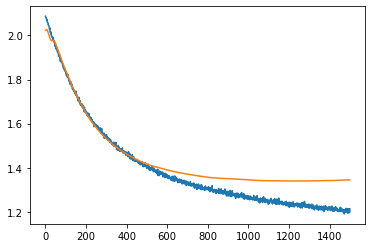

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [109]:
adam1 = Adam(learning_rate=1e-5)
basic_model.compile(optimizer=adam1, loss='categorical_crossentropy', metrics=['acc'])
basic_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 32)                576       
                                                                 
 batch_normalization_11 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 16)                272       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
Total params: 1640 (6.41 KB)
Trainable params: 1576 (6.16 KB)
Non-trainable params: 64 (256.00 Byte)
__________________

In [110]:
basic_model.fit(X_dataset, y_dataset, epochs=500, validation_split=0.2)

Epoch 1/500
17/17 [==============================] - 1s 20ms/step - loss: 2.1597 - acc: 0.0625 - val_loss: 2.2795 - val_acc: 0.0588
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1597 - acc: 0.0551 - val_loss: 2.2508 - val_acc: 0.0588
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 2.1534 - acc: 0.0643 - val_loss: 2.2249 - val_acc: 0.0588
Epoch 4/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1566 - acc: 0.0680 - val_loss: 2.2016 - val_acc: 0.0588
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1510 - acc: 0.0662 - val_loss: 2.1809 - val_acc: 0.0588
Epoch 6/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1438 - acc: 0.0717 - val_loss: 2.1622 - val_acc: 0.0588
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1442 - acc: 0.0643 - val_loss: 2.1456 - val_acc: 0.0515
Epoch 8/500
17/17 [==============================] - 0s 4ms/step - loss: 2.1457 - 

17/17 [==============================] - 0s 4ms/step - loss: 2.0299 - acc: 0.1415 - val_loss: 1.9895 - val_acc: 0.1618
Epoch 64/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0249 - acc: 0.1526 - val_loss: 1.9876 - val_acc: 0.1691
Epoch 65/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0265 - acc: 0.1324 - val_loss: 1.9858 - val_acc: 0.1618
Epoch 66/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0296 - acc: 0.1379 - val_loss: 1.9839 - val_acc: 0.1618
Epoch 67/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0293 - acc: 0.1287 - val_loss: 1.9818 - val_acc: 0.1691
Epoch 68/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0198 - acc: 0.1507 - val_loss: 1.9798 - val_acc: 0.1618
Epoch 69/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0246 - acc: 0.1489 - val_loss: 1.9780 - val_acc: 0.1691
Epoch 70/500
17/17 [==============================] - 0s 4ms/step - loss: 2.0210 - acc: 0

Epoch 125/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9205 - acc: 0.2702 - val_loss: 1.8822 - val_acc: 0.3235
Epoch 126/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9308 - acc: 0.2500 - val_loss: 1.8805 - val_acc: 0.3235
Epoch 127/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9216 - acc: 0.2776 - val_loss: 1.8788 - val_acc: 0.3235
Epoch 128/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9233 - acc: 0.2794 - val_loss: 1.8771 - val_acc: 0.3162
Epoch 129/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9169 - acc: 0.2721 - val_loss: 1.8754 - val_acc: 0.3235
Epoch 130/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9175 - acc: 0.2849 - val_loss: 1.8737 - val_acc: 0.3309
Epoch 131/500
17/17 [==============================] - 0s 4ms/step - loss: 1.9176 - acc: 0.3015 - val_loss: 1.8720 - val_acc: 0.3309
Epoch 132/500
17/17 [==============================] - 0s 4ms/step - 

17/17 [==============================] - 0s 4ms/step - loss: 1.8288 - acc: 0.3768 - val_loss: 1.7839 - val_acc: 0.4485
Epoch 187/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8244 - acc: 0.3842 - val_loss: 1.7823 - val_acc: 0.4485
Epoch 188/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8230 - acc: 0.4007 - val_loss: 1.7807 - val_acc: 0.4485
Epoch 189/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8224 - acc: 0.4044 - val_loss: 1.7793 - val_acc: 0.4485
Epoch 190/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8233 - acc: 0.3768 - val_loss: 1.7775 - val_acc: 0.4485
Epoch 191/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8189 - acc: 0.3934 - val_loss: 1.7760 - val_acc: 0.4485
Epoch 192/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8187 - acc: 0.3971 - val_loss: 1.7746 - val_acc: 0.4485
Epoch 193/500
17/17 [==============================] - 0s 4ms/step - loss: 1.8145 -

Epoch 248/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7352 - acc: 0.4467 - val_loss: 1.6921 - val_acc: 0.5074
Epoch 249/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7313 - acc: 0.4485 - val_loss: 1.6905 - val_acc: 0.5074
Epoch 250/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7262 - acc: 0.4614 - val_loss: 1.6894 - val_acc: 0.5074
Epoch 251/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7270 - acc: 0.4743 - val_loss: 1.6878 - val_acc: 0.5074
Epoch 252/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7256 - acc: 0.4614 - val_loss: 1.6863 - val_acc: 0.5074
Epoch 253/500
17/17 [==============================] - 0s 3ms/step - loss: 1.7266 - acc: 0.4577 - val_loss: 1.6849 - val_acc: 0.5074
Epoch 254/500
17/17 [==============================] - 0s 4ms/step - loss: 1.7195 - acc: 0.4577 - val_loss: 1.6836 - val_acc: 0.5074
Epoch 255/500
17/17 [==============================] - 0s 4ms/step - 

17/17 [==============================] - 0s 4ms/step - loss: 1.6449 - acc: 0.4651 - val_loss: 1.6138 - val_acc: 0.4926
Epoch 310/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6504 - acc: 0.4890 - val_loss: 1.6125 - val_acc: 0.4926
Epoch 311/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6424 - acc: 0.4926 - val_loss: 1.6113 - val_acc: 0.4926
Epoch 312/500
17/17 [==============================] - 0s 3ms/step - loss: 1.6458 - acc: 0.4761 - val_loss: 1.6101 - val_acc: 0.4926
Epoch 313/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6340 - acc: 0.4743 - val_loss: 1.6091 - val_acc: 0.4926
Epoch 314/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6431 - acc: 0.4835 - val_loss: 1.6078 - val_acc: 0.4926
Epoch 315/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6391 - acc: 0.4890 - val_loss: 1.6064 - val_acc: 0.4926
Epoch 316/500
17/17 [==============================] - 0s 4ms/step - loss: 1.6370 -

Epoch 371/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5695 - acc: 0.4945 - val_loss: 1.5483 - val_acc: 0.5147
Epoch 372/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5680 - acc: 0.4908 - val_loss: 1.5473 - val_acc: 0.5147
Epoch 373/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5723 - acc: 0.4945 - val_loss: 1.5463 - val_acc: 0.5147
Epoch 374/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5672 - acc: 0.4945 - val_loss: 1.5453 - val_acc: 0.5147
Epoch 375/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5716 - acc: 0.4908 - val_loss: 1.5443 - val_acc: 0.5147
Epoch 376/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5663 - acc: 0.4908 - val_loss: 1.5434 - val_acc: 0.5221
Epoch 377/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5719 - acc: 0.4835 - val_loss: 1.5424 - val_acc: 0.5221
Epoch 378/500
17/17 [==============================] - 0s 4ms/step - 

17/17 [==============================] - 0s 4ms/step - loss: 1.5109 - acc: 0.5092 - val_loss: 1.4986 - val_acc: 0.5074
Epoch 433/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5079 - acc: 0.4945 - val_loss: 1.4981 - val_acc: 0.5074
Epoch 434/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5127 - acc: 0.5000 - val_loss: 1.4974 - val_acc: 0.5074
Epoch 435/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5098 - acc: 0.5037 - val_loss: 1.4968 - val_acc: 0.5074
Epoch 436/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5108 - acc: 0.5000 - val_loss: 1.4961 - val_acc: 0.5074
Epoch 437/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5093 - acc: 0.4853 - val_loss: 1.4954 - val_acc: 0.5074
Epoch 438/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5037 - acc: 0.5110 - val_loss: 1.4948 - val_acc: 0.5074
Epoch 439/500
17/17 [==============================] - 0s 4ms/step - loss: 1.5106 -

Epoch 494/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4664 - acc: 0.4890 - val_loss: 1.4631 - val_acc: 0.5074
Epoch 495/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4546 - acc: 0.4926 - val_loss: 1.4627 - val_acc: 0.5074
Epoch 496/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4718 - acc: 0.4982 - val_loss: 1.4621 - val_acc: 0.5074
Epoch 497/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4592 - acc: 0.5037 - val_loss: 1.4615 - val_acc: 0.5074
Epoch 498/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4591 - acc: 0.4963 - val_loss: 1.4611 - val_acc: 0.5074
Epoch 499/500
17/17 [==============================] - 0s 3ms/step - loss: 1.4591 - acc: 0.4945 - val_loss: 1.4605 - val_acc: 0.5074
Epoch 500/500
17/17 [==============================] - 0s 4ms/step - loss: 1.4666 - acc: 0.5074 - val_loss: 1.4600 - val_acc: 0.5074
